In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
# randomly generate data  
N = 500  # number of training sample  
d = 2  # data dimension  
C = 3 # number of classes (for c = 0, 1, 2) 
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset 
cov = [[1, 0], [0, 1]] 
# generate 3 classes of datasets 
X0 = np.random.multivariate_normal(means[0], cov, N) 
X1 = np.random.multivariate_normal(means[1], cov, N) 
X2 = np.random.multivariate_normal(means[2], cov, N) 
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix) 
X = np.concatenate((X0, X1, X2), axis = 0).T  
# extended data by add row ONES (equivalent to 1) at first place 
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0) 
 
# Generate label for data points of each class (0, 1, 2) 
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2 
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

print(X.shape)
print(original_label.shape)

(3, 1500)
(1500,)


In dữ liệu ra màn hình để hình dung trực quan 

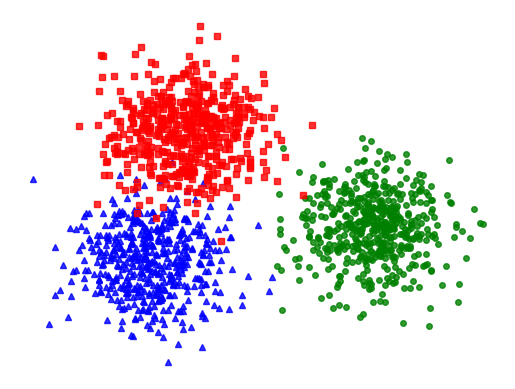

In [2]:
def display(X, label): 
    X0 = X[:, label == 0] 
    X1 = X[:, label == 1] 
    X2 = X[:, label == 2] 
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8) 
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8) 
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8) 
    plt.axis('off') 
    plt.plot() 
    plt.show() 
 
display(X[1:, :], original_label) 

In [3]:
from scipy import sparse  
def convert_labels(y, C = C): 
    """ 
    convert 1d label to a matrix label: each column of this  
    matrix coresponding to 1 element in y. In i-th column of Y,  
    only one non-zeros element located in the y[i]-th position,  
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return 
 
            [[1, 0, 0, 1], 
             [0, 0, 1, 0], 
             [0, 1, 0, 0]] 
    """ 
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray() 
    return Y  
 
# Y = convert_labels(y, C) 

Xây dựng các phương thức cần cho mô hình hồi quy logistic nhiều lớp: 
- Hàm chuyển từ một vector dữ liệu sang dạng one-hot-coding tức là các vector chỉ gồm 0/1/2 ứng với các nhãn của điểm dữ liệu: 

In [4]:
def softmax_stable(Z): 
    """
     Compute softmax values for each sets of scores in Z. 
    each column of Z is a set of score.     
    """ 
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True)) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
def softmax(Z): 
    """ 
    #Compute softmax values for each sets of scores in V. 
    #each column of V is a set of score.     
    """ 
    e_Z = np.exp(Z) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000): 
    W = [W_init]     
    C = W_init.shape[1] 
    Y = convert_labels(y, C) 
    it = 0 
    N = X.shape[1] 
    d = X.shape[0] 
     
    count = 0 
    check_w_after = 20 
    while count < max_count: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in mix_id: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(C, 1) 
            ai = softmax(np.dot(W[-1].T, xi)) 
            W_new = W[-1] + eta*xi.dot((yi - ai).T) 
            count += 1 
            # stopping criteria 
            if count%check_w_after == 0:                 
                if np.linalg.norm(W_new - W[-check_w_after]) < tol: 
                    return W 
            W.append(W_new) 
    return W 
 
# cost or loss function   
def cost(X, Y, W): 
    A = softmax(W.T.dot(X)) 
    return -np.sum(Y*np.log(A)) 
 
# Predict that X belong to which class (1..C now indexed as 0..C-1 )  
def pred(W, X): 
    """ 
    predict output of each columns of X 
    Class of each x_i is determined by location of max probability 
    Note that class are indexed by [0, 1, 2, ...., C-1] 
    """ 
    A = softmax_stable(W.T.dot(X)) 
    return np.argmax(A, axis = 0) 
 
# W[-1] is the solution, W is all history of weights

In ra kết quả (bộ hệ số w) 

In [8]:
print(X.shape)
print(original_label.shape)
eta = .05  
d = X.shape[0] 
W_init = np.random.randn(X.shape[0], C) 
W = softmax_regression(X, original_label, W_init, eta) 
print(W[-1]) 

(3, 1500)
(1500,)
[[ 8.10239539 -4.09921045 -3.99473785]
 [-0.53513027  2.18505406 -0.31468342]
 [-0.09443218  0.10835446  2.73462537]]


Phần code in kết quả trực quan (phần này các bạn thực hiện chỉ để quan sát) 

(1, 270400)
(3, 270400)


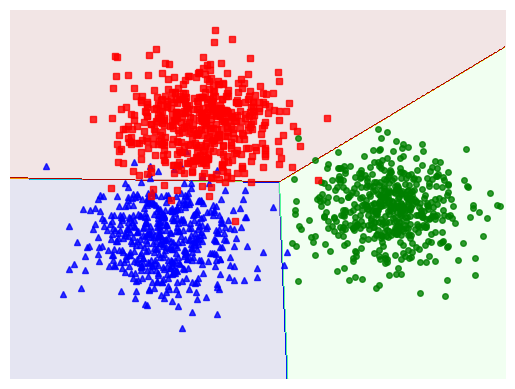

<Figure size 640x480 with 0 Axes>

In [6]:
#Visualize  
 
xm = np.arange(-2, 11, 0.025) 
xlen = len(xm) 
ym = np.arange(-3, 10, 0.025) 
ylen = len(ym) 
xx, yy = np.meshgrid(xm, ym) 
 
print(np.ones((1, xx.size)).shape) 
xx1 = xx.ravel().reshape(1, xx.size) 
yy1 = yy.ravel().reshape(1, yy.size) 
 
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0) 
 
print(XX.shape) 
 
Z = pred(W[-1], XX) 
 
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1) 
 
plt.xlim(-2, 11) 
plt.ylim(-3, 10) 
plt.xticks(()) 
plt.yticks(()) 
 
display(X[1:, :], original_label) 
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300) 